# DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

## Objective:

This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.

## Dataset:

Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.


## Tasks:

### 1. Data Exploration and Preprocessing:

#### 	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).

In [28]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [29]:
df = pd.read_csv('./adult_with_headers.csv')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#### 	Handle missing values as per the best practices (imputation, removal, etc.).

In [30]:
# Checking for Null Values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [31]:
# Checking for Duplicate Values
df.duplicated().sum()

24

In [32]:
display(df.loc[df.duplicated()])
print(f'No duplicated rows as such.')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


No duplicated rows as such.


In [33]:
# Checking for feature datatypes
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [34]:
# Statistical Summary
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

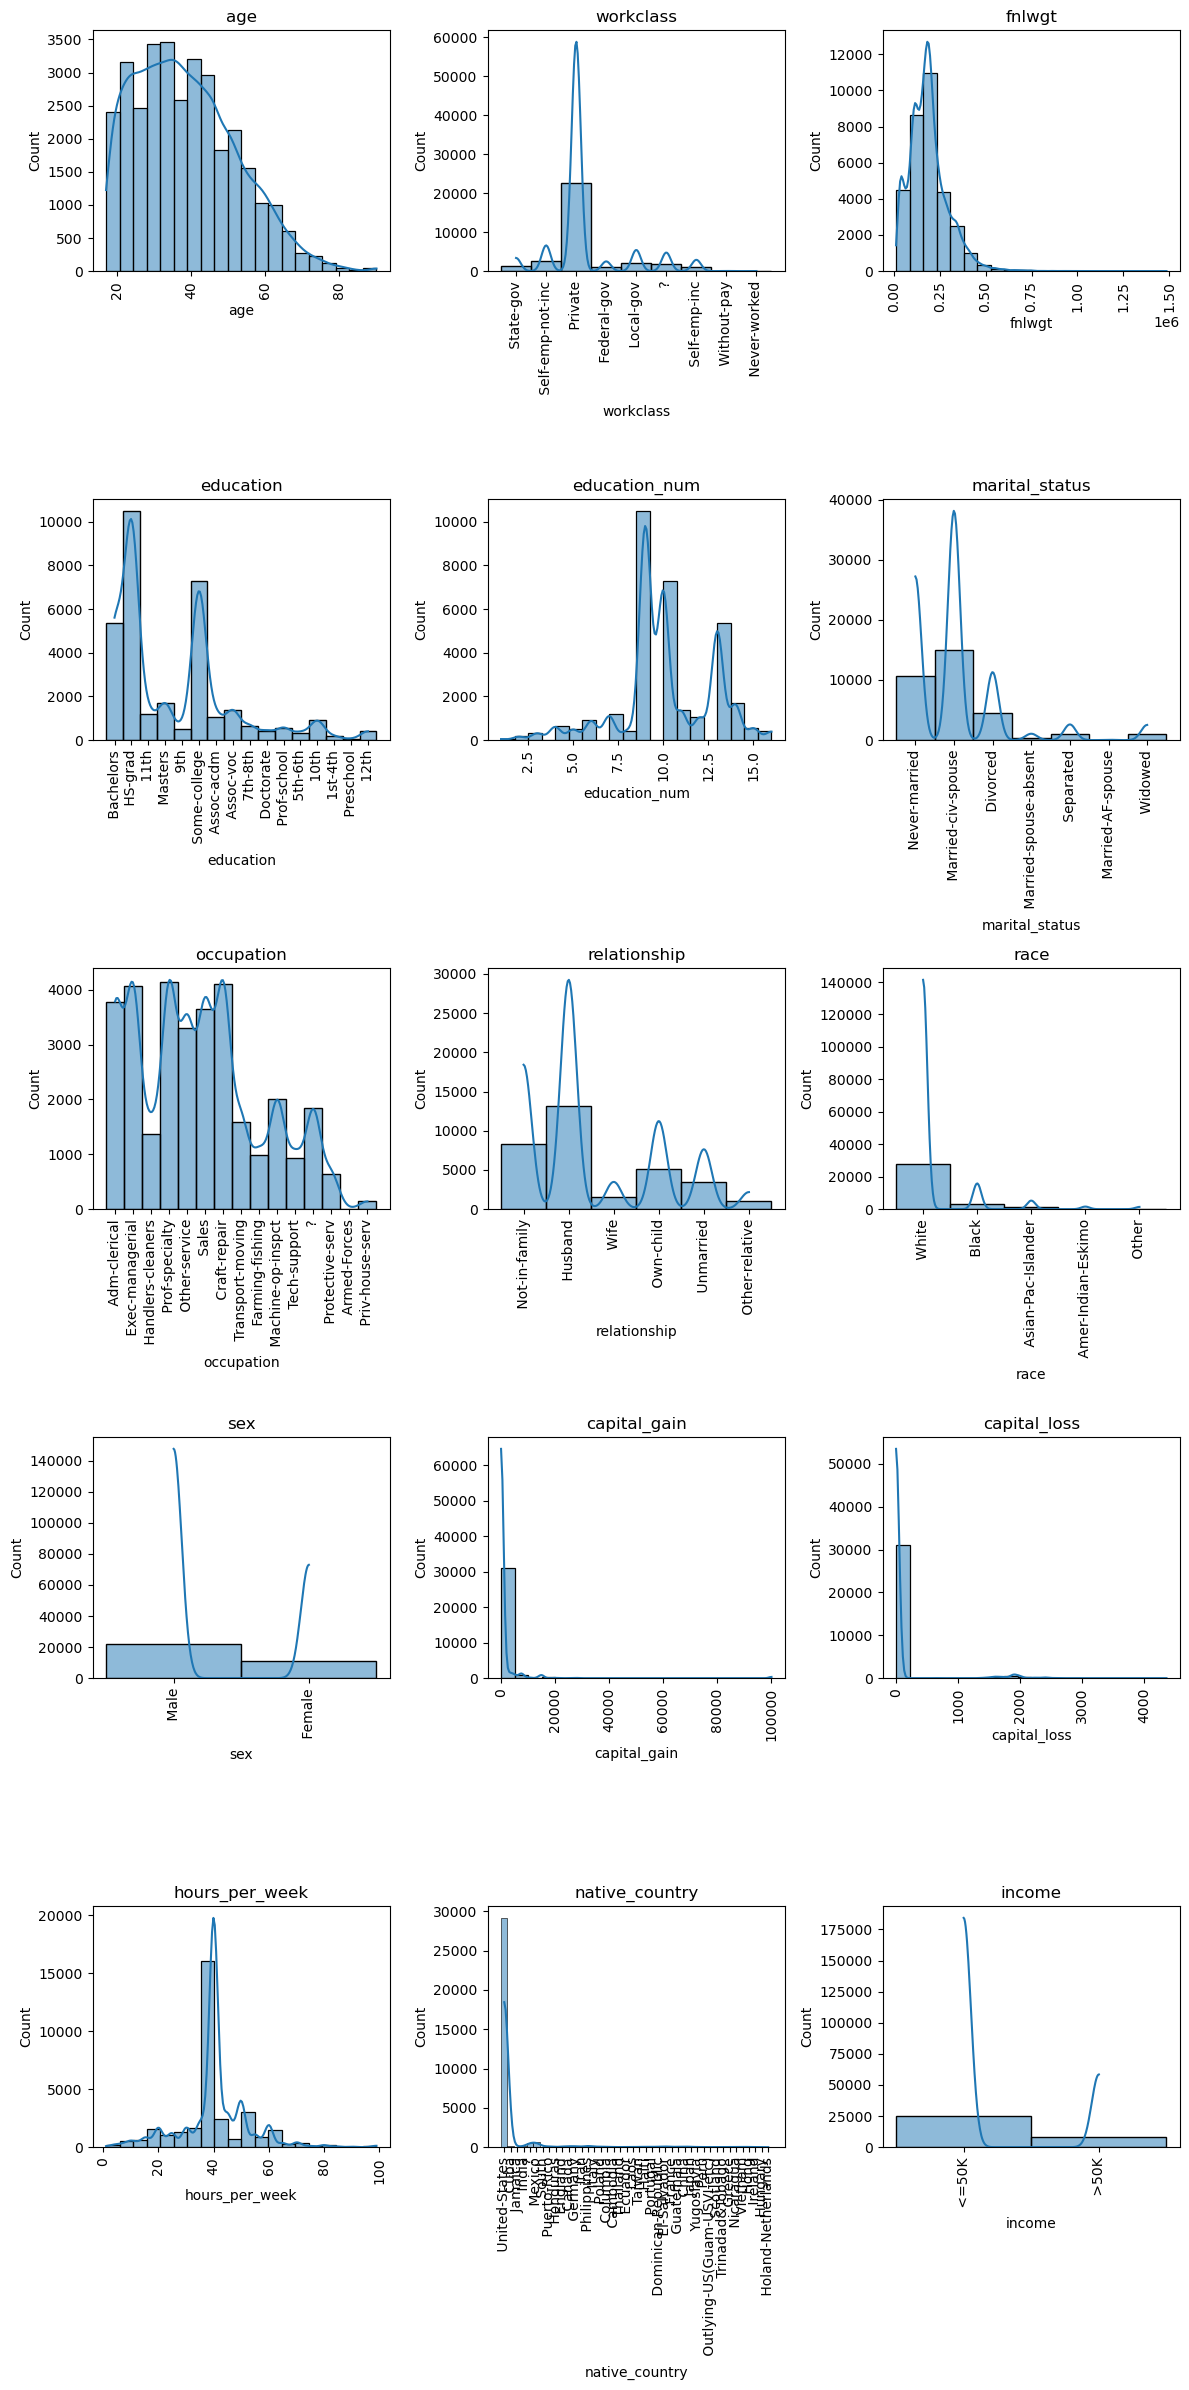

In [36]:
# Checking for the type of Distribution of Variables:

plt.figure(figsize=(12, 24))
for i, col in enumerate(df.columns):
    plt.subplot(5, 3, i+1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.xticks(rotation=90)
    plt.title(col)
plt.tight_layout()
plt.show()

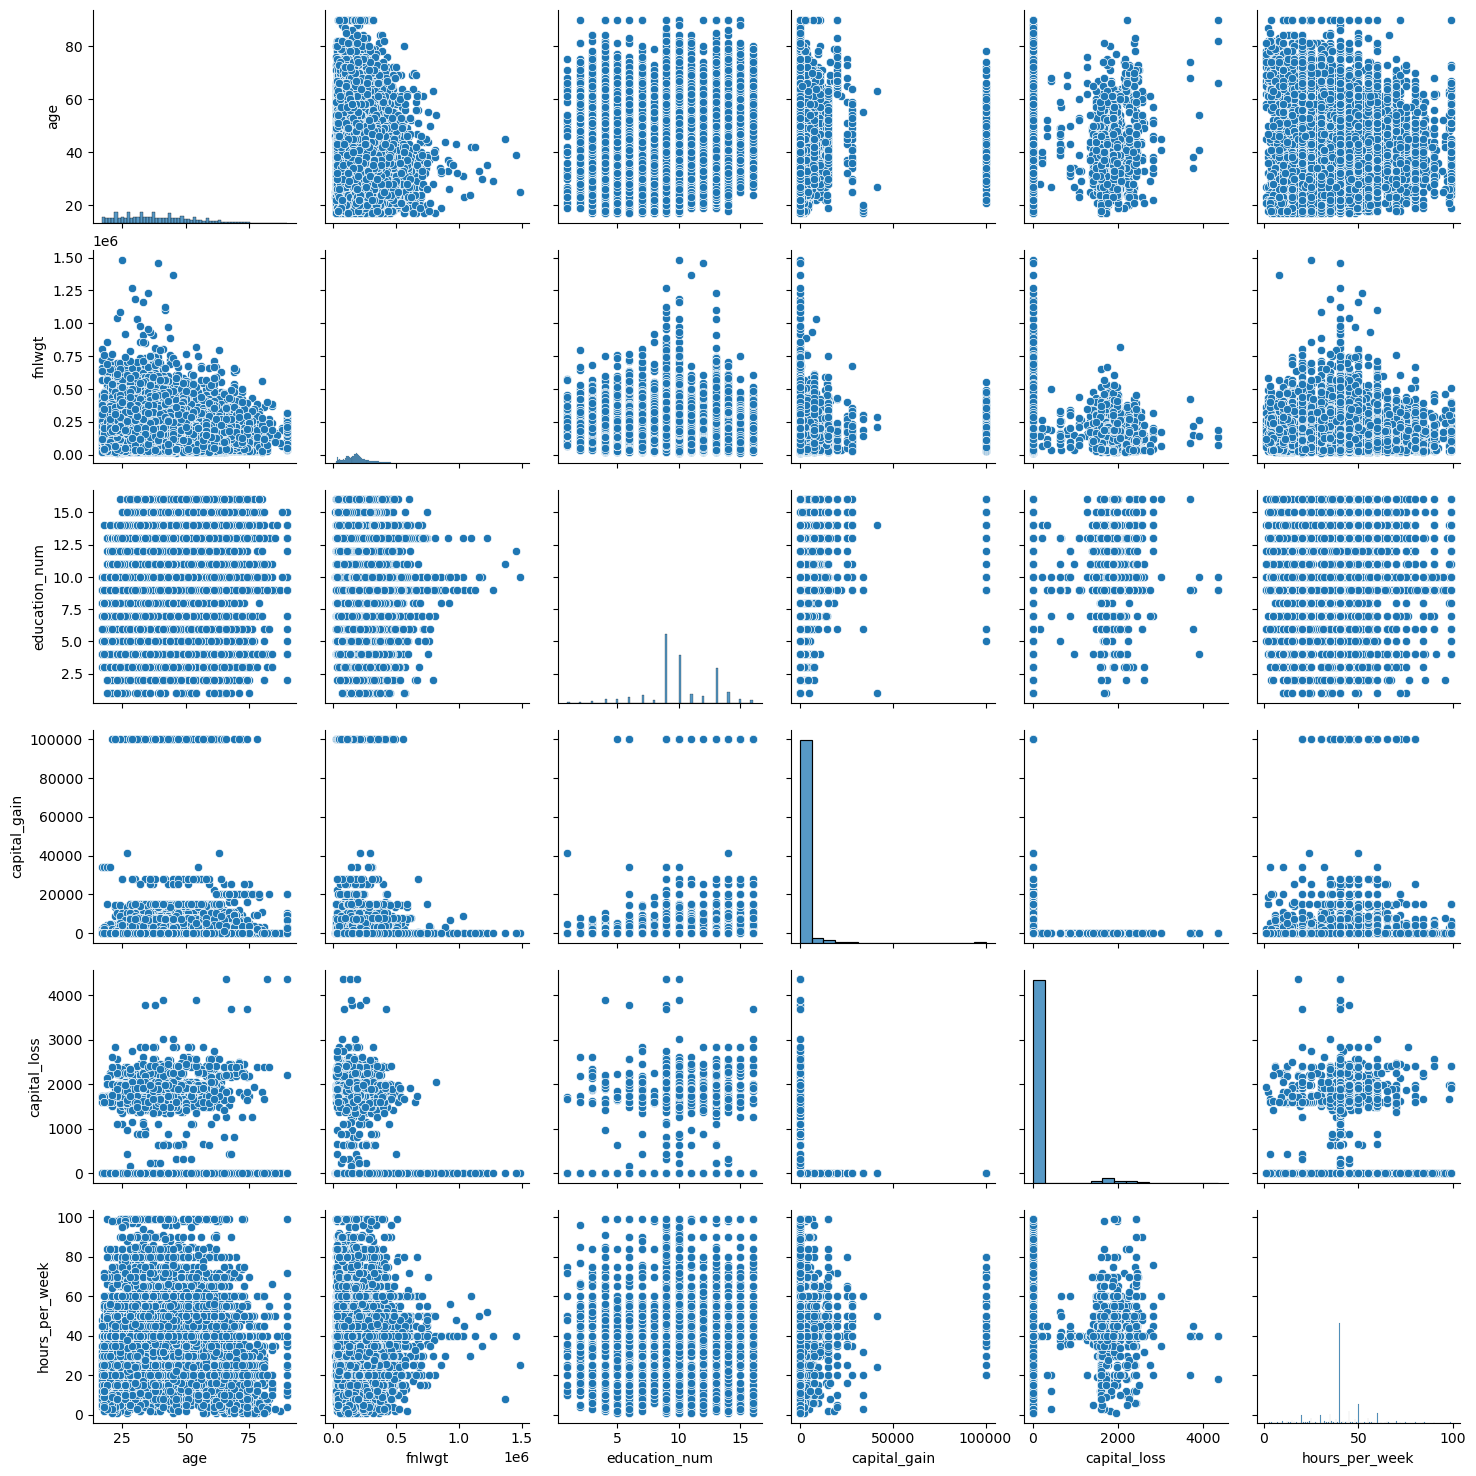

In [37]:
# Checking for Correlation:
sns.pairplot(df)

#### 	Apply scaling techniques to numerical features:
*	Standard Scaling
*	Min-Max Scaling


In [38]:
# Scaling Numerical Features
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Applying Standard Scaling
scaler = StandardScaler()
standard_scaled_data = scaler.fit_transform(df[numerical_features])
standard_scaled_df = pd.DataFrame(standard_scaled_data, columns=numerical_features)
print('Standardized Data using Standard Scaler')
display(standard_scaled_df)

# Applying Min-Max Scaling
min_max_scaler = MinMaxScaler()
min_max_scaled_data = min_max_scaler.fit_transform(df[numerical_features])
min_max_scaled_df = pd.DataFrame(min_max_scaled_data, columns=numerical_features)
print('Standardized Data using Min-Max Scaler')
display(min_max_scaled_df)

Standardized Data using Standard Scaler


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


Standardized Data using Min-Max Scaler


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


#### 	Discuss the scenarios where each scaling technique is preferred and why.

##### Scenarios for Scaling Techniques

* Standard Scaling (Z-score normalization):

    Prefered when the features have a Gaussian distribution or when the algorithm assumes zero-centered data. It scales the features to have a mean of 0 and a standard deviation of 1, preserving the shape of the distribution.

    * Advantages:
        Centers the data around zero, making it easier to interpret and scales the features to have a mean of 0 and a standard deviation of 1, preserving the shape of the distribution. It does not bound the data to a specific range, which can be useful if the algorithm does not require bounded input.

* Min-Max Scaling:

    Suitable when the algorithm doesn't assume a normal distribution and when the scale of the features varies widely. It scales the features to a fixed range (typically 0 to 1), preserving the relationships between the original values.

    * Advantages:
        It scales the features to a fixed range, making it easier to compare the relative importance of different features, also preserves the relationships between the original values, maintaining the distribution shape. It's useful when the algorithm or model requires bounded input features.

### 2. Encoding Techniques:

#### 	Apply One-Hot Encoding to categorical variables with less than 5 categories.

In [39]:
# Selecting Categorical Columns
categorical_features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']

# Applying One-Hot Encoding to categorical variables with less than 5 categories
for feature in categorical_features:
    if len(df[feature].unique()) < 5:
        one_hot_encoded = pd.get_dummies(df[feature], prefix=feature, dtype='int64')
        df = pd.concat([df, one_hot_encoded], axis=1)
        df.drop(columns=[feature], inplace=True)

display(df)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,0,1,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,0,1,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,0,1,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,0,1,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,38,United-States,1,0,1,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,40,United-States,0,1,0,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,40,United-States,1,0,1,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,20,United-States,0,1,1,0


#### 	Use Label Encoding for categorical variables with more than 5 categories.

In [40]:
# Applying Label Encoding for categorical variables with more than 5 categories
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for feature in categorical_features:
    if feature in df.columns:
        if len(df[feature].unique()) >=5:
            df[feature] = label_encoder.fit_transform(df[feature])
    else:
        continue
display(df)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,1,1,0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,1,1,0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,1,1,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,1,1,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,1,0,1,0
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,0,1,0,1
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,1,0,1,0
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,0,1,1,0


####	Discuss the pros and cons of One-Hot Encoding and Label Encoding.

##### Pros and Cons of Encoding Techniques:

* One-Hot Encoding:

    * Pros:
    
        1. Preserves all information:One-Hot Encoding preserves all theinformation presetn in the categorical variable by creating binary columns for each category.

        2. Suitable for algorithms that do not assume ordinal relationships: It's appropriate for algorithms like decision trees or random forests, which do not assume any ordinal relationship between categories.

        3. Doesn't assume any numerical significance: One-Hot Encoding treats each category as independent, which can be useful when there's no inherent order or hierarchy in the categories.

        4. Interpretability: The resulting binary columns make it easy to understand the contribution of each category to the prediction.

    * Cons:

        1. Increases dimensionality: One-Hot Encoding increases the dimensionality of the dataset significantly, especially when dealing with categorical variables with many unique categories, which can lead to the curse of dimensionality.

        2. Introduces multicollinearity: The newly created binary columns can be correlated with each other, leading to multicollinearity issues in the dataset, which can affect the performance of some models like linear regression.

        3. Not suitable for high-cardinality categorical variables: One-Hot Encoding might not be feasible for categorical variables with a large number of unique categories, as it can lead to a sparse matrix and computational inefficiency.

* Label Encoding:

    * Pros:

        1. Reduces Dimensionality: Label Encoding reduces the dimensionality of the categorical variable by assigning a unique integer to each category, which can be beneficial for memory usage and computational efficiency.

        2. Preserves ordinality: Label Encoding preserves the ordinal relationship if present in the categories, which can be useful for algorithms that can interpret the magnitude of category values.

        3. Simplicity: Label Encoding is simple to implement and can be useful when dealing with categorical variables with a moderate number of unique categories.

    * Cons:

        1. Assumes ordinality: Label Encoding assumes ordinal relationships between categories, which might not be accurate or relevant in some cases, leading to incorrect interpretations by the model.

        2. May introduce unintended ordinality: Label Encoding may inadvertently introduce an ordical relationship between categories where none exists, which can mislead the model during training.

        3. Not suitable for algorithms that don't assume magnitude: Label Encoding might not be appropriate for algorithms that don't interpret the magnitude of category values, as it can lead to incorrect model assumptions.

### 3. Feature Engineering:

#### 	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

In [41]:
# Feature 1: Age Group

bins = [0, 25, 45, 65, 100]
lables = ['Young', 'Middle-aged', 'Senior', 'Elderly']

# Creating the age group feature
df['age_group'] = pd.cut(df['age'], bins=bins, labels=lables)

display(df)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,age_group
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,1,1,0,Middle-aged
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,1,1,0,Senior
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,1,1,0,Middle-aged
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,1,1,0,Senior
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,1,0,1,0,Middle-aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,1,0,1,0,Middle-aged
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,0,1,0,1,Middle-aged
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,1,0,1,0,Senior
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,0,1,1,0,Young


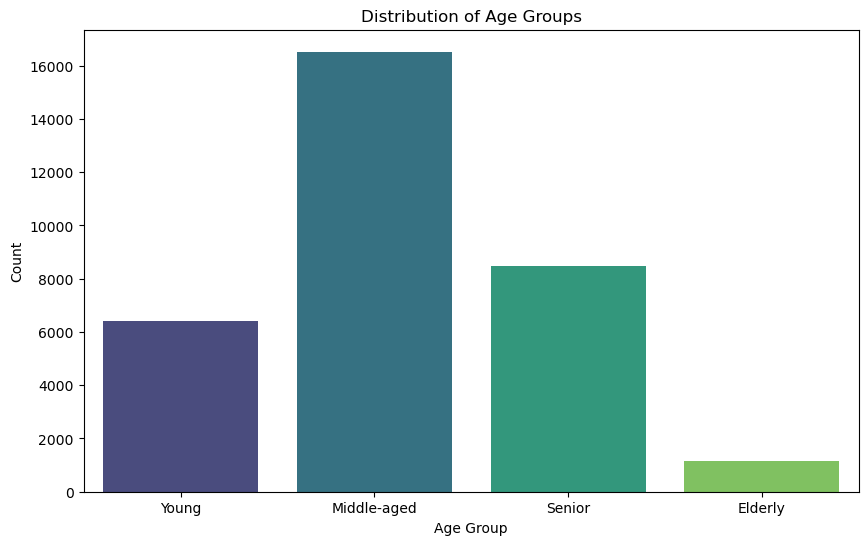

In [42]:
# Bar plot for age_group
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=df, palette='viridis')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

##### Rationale:
Grouping ages into categories can help the model capture different income patterns across different age groups.

In [43]:
# Feature 2: has_capital_gain
df['has_capital_gain'] = df['capital_gain'].apply(lambda x: 1 if x > 0 else 0)

df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,age_group,has_capital_gain
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,1,1,0,Middle-aged,1
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,1,1,0,Senior,0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,1,1,0,Middle-aged,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,1,1,0,Senior,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,1,0,1,0,Middle-aged,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,1,0,1,0,Middle-aged,0
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,0,1,0,1,Middle-aged,0
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,1,0,1,0,Senior,0
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,0,1,1,0,Young,0


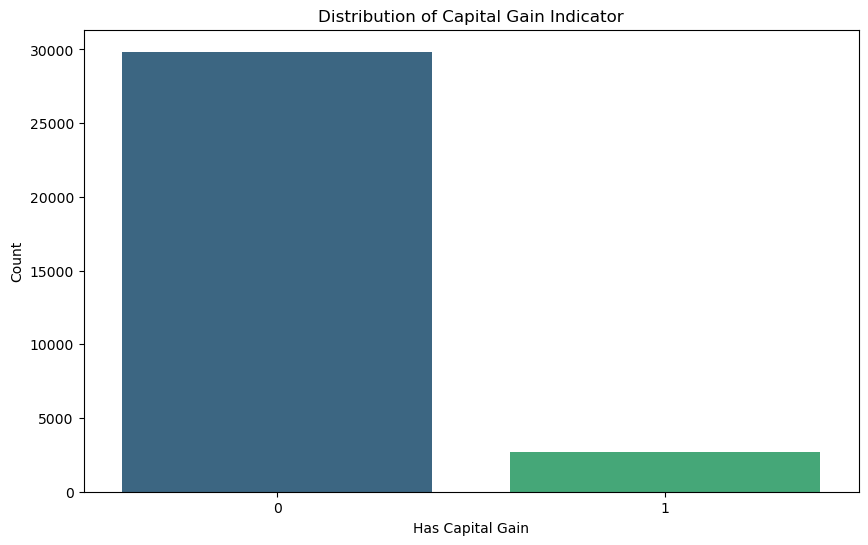

In [44]:
# Bar plot for has_capital_gain
plt.figure(figsize=(10, 6))
sns.countplot(x='has_capital_gain', data=df, palette='viridis')
plt.title('Distribution of Capital Gain Indicator')
plt.xlabel('Has Capital Gain')
plt.ylabel('Count')
plt.show()

##### Rationale:

This binary feature can help the model distinguish between individuals with and without capital gains, which might correlate with income.

#### 	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

In [45]:
# Applying Log Transformation of capital_gain feature
import numpy as np
df['capital_gain_transformed'] = df['capital_gain'].apply(lambda x: np.log(x + 1))

display(df[['capital_gain', 'capital_gain_transformed']])

,capital_gain,capital_gain_transformed
0,2174,7.684784
1,0,0.000000
2,0,0.000000
3,0,0.000000
4,0,0.000000
...,...,...
32556,0,0.000000
32557,0,0.000000
32558,0,0.000000
32559,0,0.000000


##### Rationale:
Log transformation can reduce skewness, making the distribution more symmetrical and improving the performance of algorithms sensitive to the distribution of features.

### 4. Feature Selection:

####	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance

In [46]:
# Features for outlier detection
features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Applying Isolation Forest
from sklearn.ensemble import IsolationForest

# Initializing Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model
outliers = iso_forest.fit_predict(df[features])

# Adding outlier information to the dataset
df['outliers'] = outliers

# Filtering outliers
df_cleaned = df[df['outliers'] != -1]

# Droping outlier column
df_cleaned.drop(columns=['outliers'], inplace=True)

print(f'Original Dataset Size:')
display(df.shape[0])

print(f'Cleaned Dataset Size:')
display(df_cleaned.shape[0])

Original Dataset Size:


32561

Cleaned Dataset Size:


32235

#### 	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.

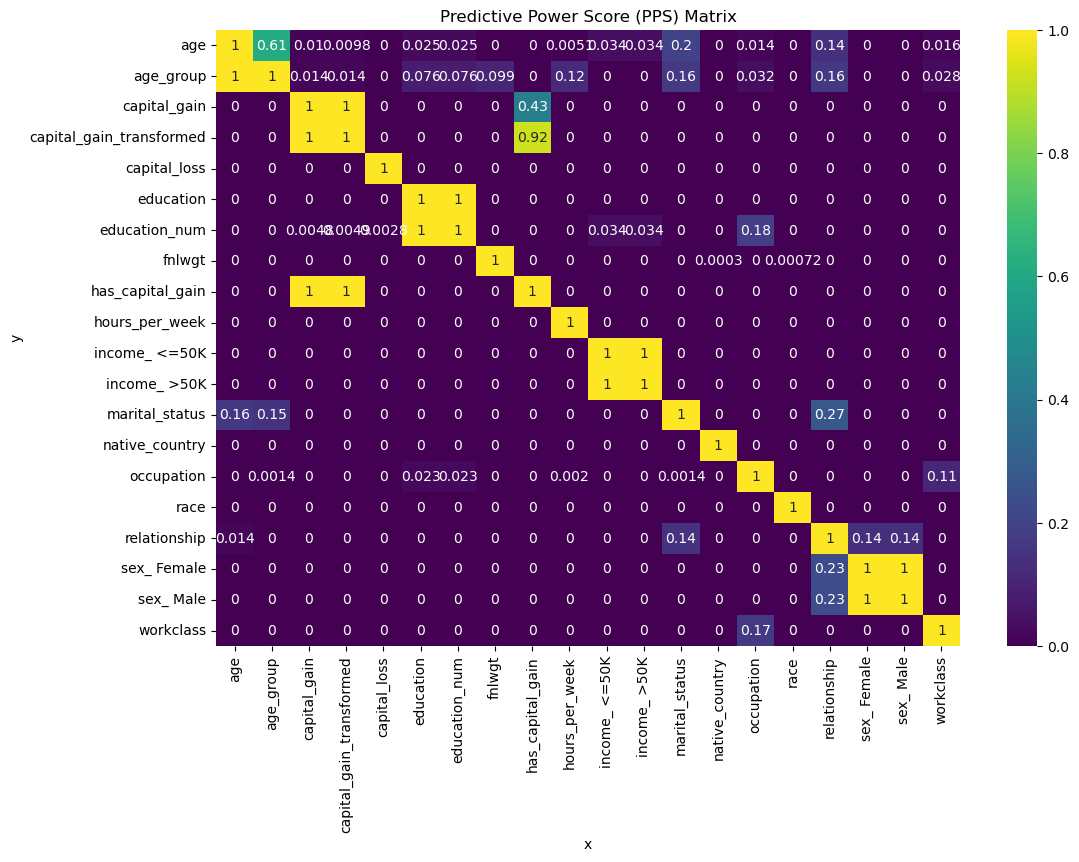

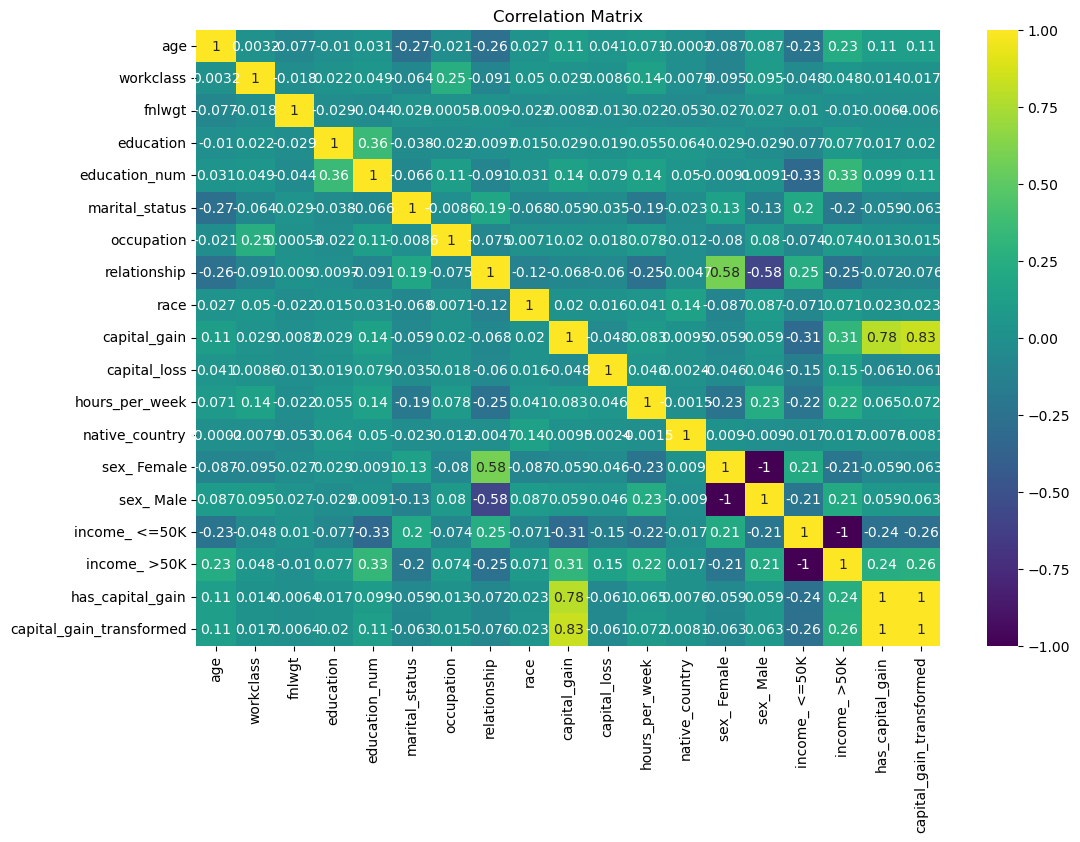

In [47]:
# Applying PPScore
import ppscore as pps

# Calculating PPS matrix
pps_matrix = pps.matrix(df_cleaned)

# Extracting PPS Score
ppscore = pps_matrix.pivot(columns='x', index='y', values='ppscore')

# Calculating Correlation Matrix
correlation_matrix = df_cleaned.corr()

# Plot the PPS matrix
plt.figure(figsize=(12, 8))
sns.heatmap(ppscore, annot=True, cmap="viridis", cbar=True)
plt.title('Predictive Power Score (PPS) Matrix')
plt.show()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", cbar=True)
plt.title('Correlation Matrix')
plt.show()

##### Comparison:

1. Age and Income:

    * PPScore: Age has a moderate predictive power for income > 50K and income <= 50K.

    * Correlation: Age is positively correlated with income > 50K and negatively correlated with income <= 50K.

2. Education and Income:

    * PPScore: Education and education_num both have no direct predictive power for income > 50K or income <= 50K.

    * Correlation: Education_num is positively correlated with income > 50K and negatively correlated with income <= 50K.

3. Capital Gain and Income:

    * PPScore: Capital_gain has a high predictive power for income > 50K and for has_capital_gain.

    * Correlations: Capital_gain is highly correlated with income > 50K and negatively correlated with income <= 50K.

4. Marital Status and Income:

    * PPScore: Marital_Status has moderate predictive power for income > 50K and income <= 50K.

    * Correlation: Marital_status is negatively correlated with income <= 50K and positively correlated with income > 50K.

5. Hours per Week and Income:

    * PPScore: Hours_per_week has no predictive power for income categories.

    * Correlation: Hours_per_week is positively correlated with income > 50K and negatively correlated with income <= 50K.

6. Relationship and Sex:

    * PPScore: Relationship has a notable predictive power for sex.

    * Correlation: Relationship is highly correlated with sex.

##### Conclusion:

The PPScore matrix and the correlation matrix complement each other. While the PPScore identifies predictive relationships (which can be non-linear and more complex), the correlation matrix provides insights into linear relationships. In practice, both tools can be used together to gain a comprehensive understanding of the relationships in the dataset. For instance, capital_gain is both highly predictive and highly correlated with income > 50K, which reinforces its importance in predicting income levels.